<a href="https://colab.research.google.com/github/AbdulMominAlam/DSA/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:

!pip install xgboost --quiet


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage


df_macro = pd.read_csv("dataset1_macro_rnd.csv")
df_gov = pd.read_csv("dataset2_gov_rnd_share.csv")
df_exports = pd.read_csv("dataset3_tech_exports.csv")




In [22]:
# Features and target
X = df[['GDP_Growth', 'Inflation', 'Unemployment', 'Gov_R&D_Share', 'HighTech_Exports']]
y = df['R&D_Spending']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for PCA & clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Linear Regression → RMSE: 0.742, R²: 0.124


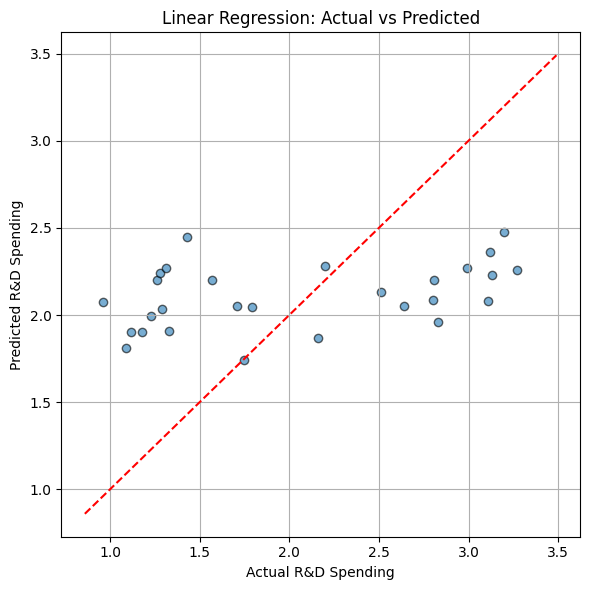

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print(f'Linear Regression → RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.3f}, R²: {r2_score(y_test, y_pred_lr):.3f}')
# Prediction vs Actual Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual R&D Spending")
plt.ylabel("Predicted R&D Spending")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

Decision Tree → RMSE: 0.944, R²: -0.416


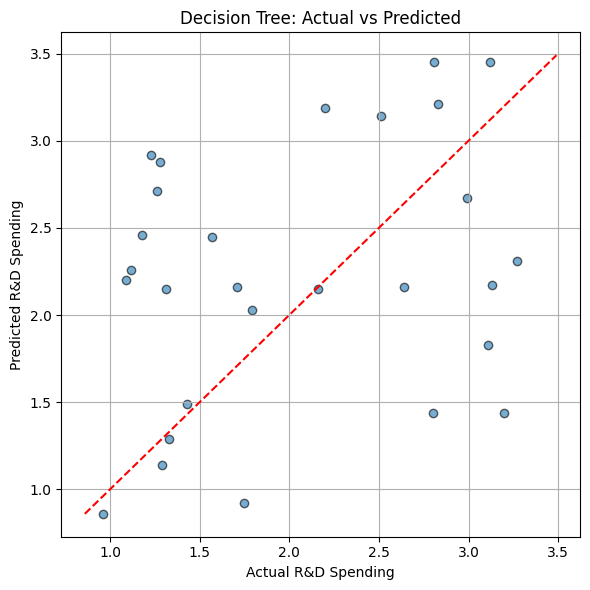

In [24]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f'Decision Tree → RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.3f}, R²: {r2_score(y_test, y_pred_dt):.3f}')

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual R&D Spending")
plt.ylabel("Predicted R&D Spending")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest → RMSE: 0.670, R²: 0.287


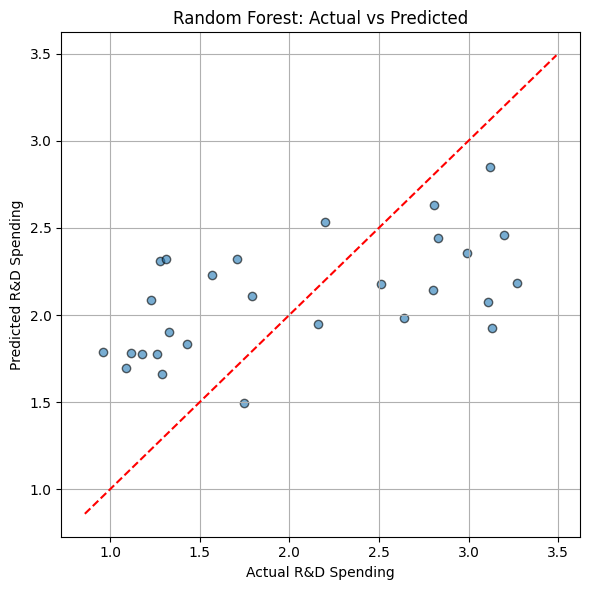

In [25]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(f'Random Forest → RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}, R²: {r2_score(y_test, y_pred_rf):.3f}')

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual R&D Spending")
plt.ylabel("Predicted R&D Spending")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


XGBoost → RMSE: 0.752, R²: 0.102


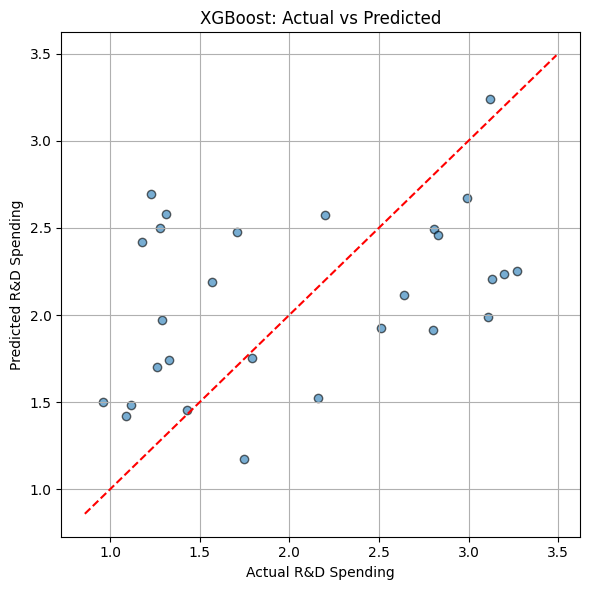

In [26]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(f'XGBoost → RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.3f}, R²: {r2_score(y_test, y_pred_xgb):.3f}')

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual R&D Spending")
plt.ylabel("Predicted R&D Spending")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


kNN → RMSE: 0.774, R²: 0.048


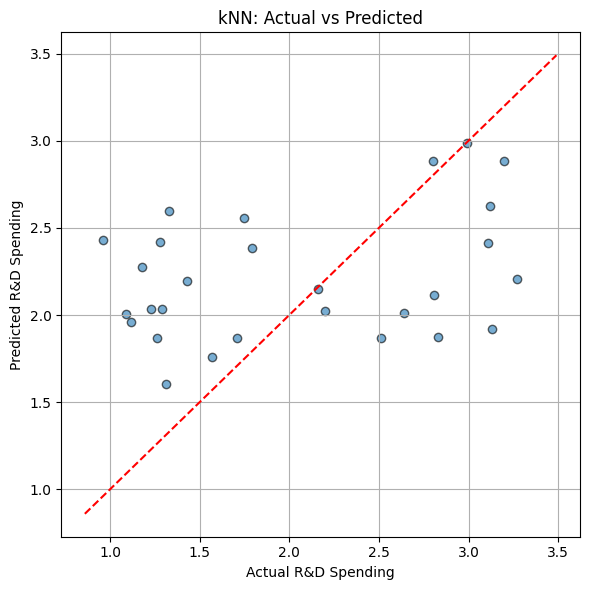

In [27]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(f'kNN → RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.3f}, R²: {r2_score(y_test, y_pred_knn):.3f}')

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual R&D Spending")
plt.ylabel("Predicted R&D Spending")
plt.title("kNN: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


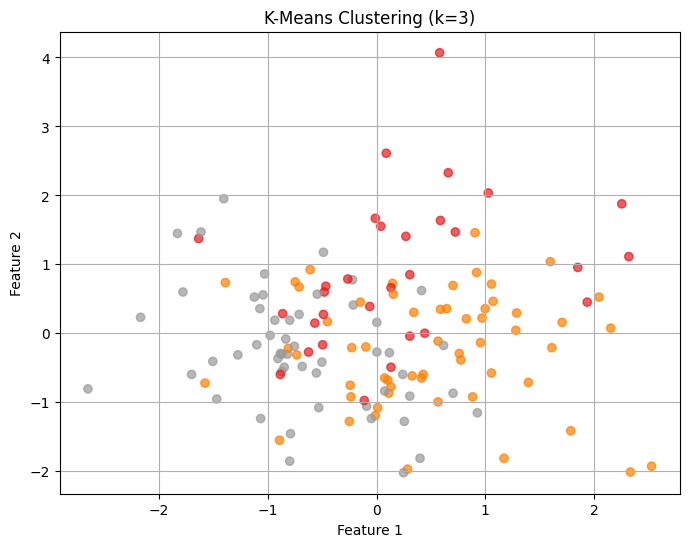

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='Set1', alpha=0.7)
plt.title("K-Means Clustering (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


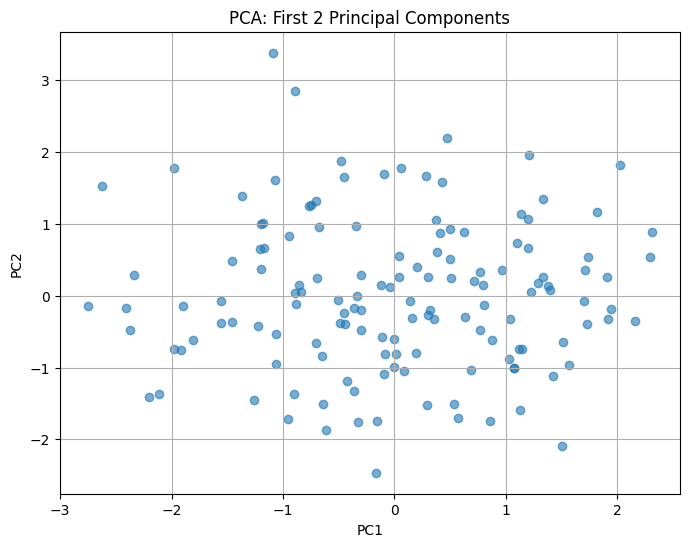

PCA Component Loadings:


,GDP_Growth,Inflation,Unemployment,Gov_R&D_Share,HighTech_Exports
PC1,-0.598877,-0.279814,0.073333,-0.384547,0.640154
PC2,-0.230192,0.702462,-0.158395,-0.603771,-0.252846


In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title("PCA: First 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Print component coefficients (loadings)
components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("PCA Component Loadings:")
components

